In [259]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Defining the path of file
file = "messi_goals.csv"
data = pd.read_csv(file, encoding = 'ISO-8859-1')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            704 non-null    object
 1   Competition       704 non-null    object
 2   Matchday          704 non-null    object
 3   Date              704 non-null    object
 4   Venue             704 non-null    object
 5   Club              704 non-null    object
 6   Opponent          704 non-null    object
 7   Result            704 non-null    object
 8   Playing_Position  704 non-null    object
 9   Minute            704 non-null    int64 
 10  At_score          704 non-null    object
 11  Type              703 non-null    object
 12  Goal_assist       490 non-null    object
dtypes: int64(1), object(12)
memory usage: 71.6+ KB


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,01-05-05,H,FC Barcelona,Albacete Balompie,2:00,CF,91,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,02-11-05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,04/05,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,04/05,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [261]:
#Shows the basic statistics
df = pd.DataFrame(data)

In [263]:
statistics = df.describe()
print(statistics)

           Minute
count  704.000000
mean    51.923295
std     25.933163
min      3.000000
25%     30.000000
50%     54.000000
75%     75.000000
max    110.000000


In [265]:
#Kurtosis of the data
data.kurt(numeric_only=True)

Minute   -1.192113
dtype: float64

In [267]:
#Skewness of the data
data.skew(numeric_only=True)

Minute   -0.110139
dtype: float64

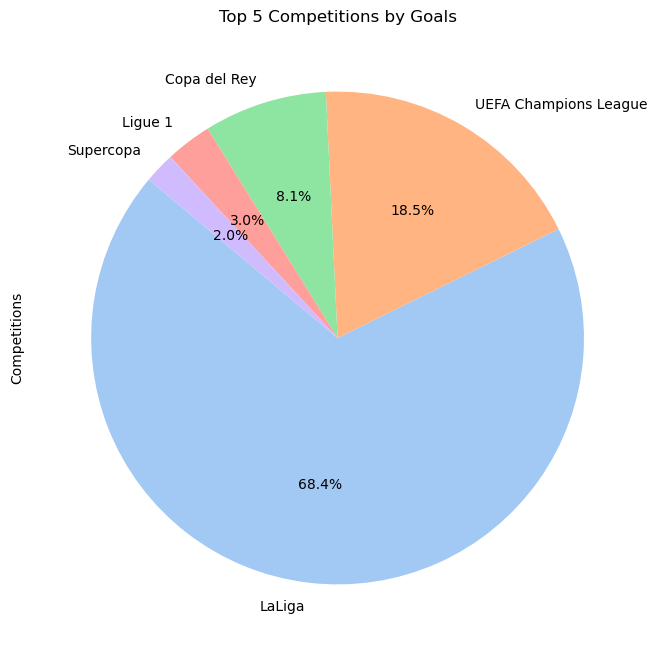

In [269]:
#pie chart of goals by top 5 scoring competition
"""
Created a pie chart showing the distribution of goals scored in the top 5 competitions. 
"""

def plot_top5_goals_by_competition_pie(data):
    top5_competitions = data['Competition'].value_counts().nlargest(5)

    #Plotting the data
    plt.figure(figsize=(10,8))
    top5_competitions.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.ylabel('Competitions')
    plt.title('Top 5 Competitions by Goals')
    plt.show()

#Calling the plot
plot_top5_goals_by_competition_pie(data)

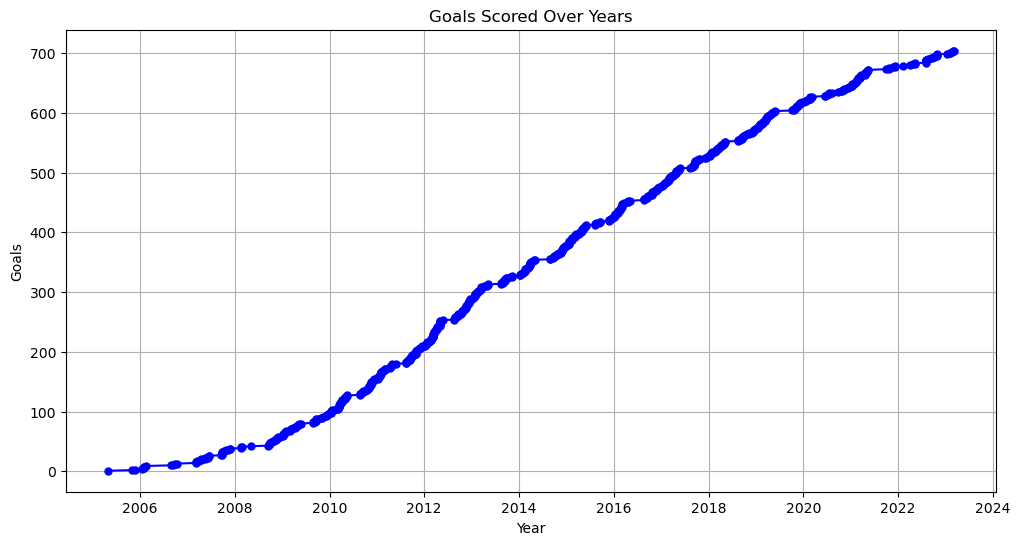

In [271]:
#Line Chart of Goals over Years
""" 
Changed the date format to read the values properly.
Converted the date column to datetime.
Sorted the date column for cumulative goal counts.
Created a line chart for goals scored over years. 
"""

def parse_dates(date_str):
    for fmt in ("%d-%m-%y", "%d/%m/%y", "%Y-%m-%d", "%m/%d/%Y", "%d-%b-%Y"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.to_datetime(date_str, errors='coerce')

def plot_goals_over_time_line(data):
    # Apply the custom date parser to the 'Date' column
    data['Date'] = data['Date'].apply(parse_dates)
    
    # Sort data by date and reset the index
    data_sorted = data.sort_values('Date').reset_index(drop=True)
    
    # Create a column for cumulative goals
    data_sorted['Goals'] = range(1, len(data_sorted) + 1)
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(data_sorted['Date'], data_sorted['Goals'], color='blue', marker='o', markersize=5)
    plt.xlabel('Year')
    plt.ylabel('Goals')
    plt.title('Goals Scored Over Years')
    plt.grid(True)
    plt.show()

#Calling the plot
plot_goals_over_time_line(data)

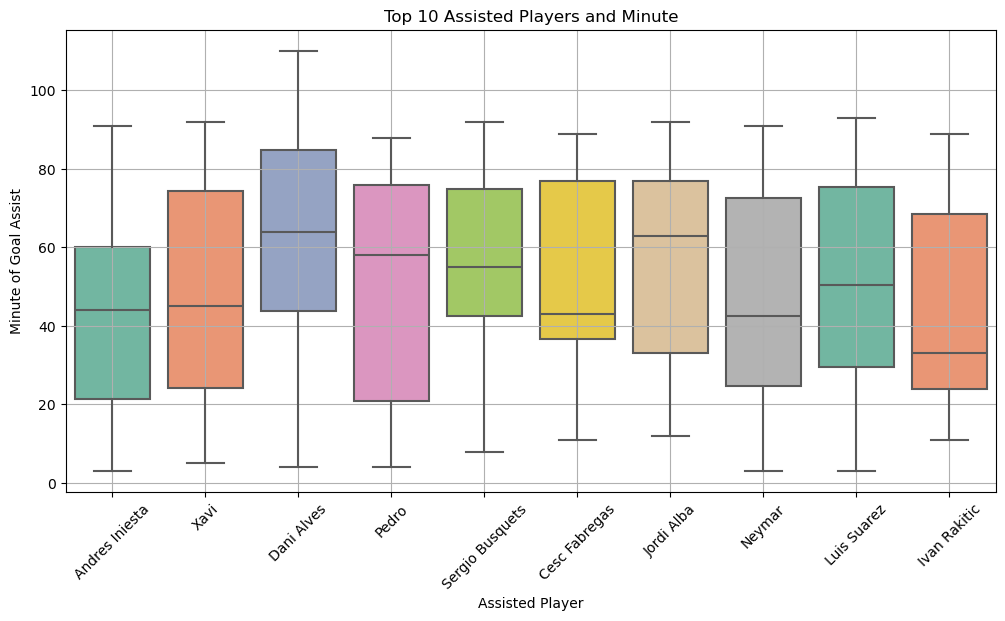

In [273]:
#Box plot of Top 10 Assisted Players and Minute
"""
Removing Missing values in Goal_assist Column as there are many goals without assists.
Displayed only the top 10 players who have assisted messi.
Converted the Minute column to numeric.
Created a box plot for top 10 assisted players and minute of the goal.
"""

assist_data = data.dropna(subset=['Goal_assist'])
top_assist_players = assist_data['Goal_assist'].value_counts().head(10).index
top_assist_data = assist_data[assist_data['Goal_assist'].isin(top_assist_players)].copy()
top_assist_data.loc[:, 'Minute'] = pd.to_numeric(top_assist_data['Minute'])

# Plotting the data
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_assist_data, x='Goal_assist', y='Minute', palette="Set2")
plt.title('Top 10 Assisted Players and Minute')
plt.xlabel('Assisted Player')
plt.ylabel('Minute of Goal Assist')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()